# 2.2 COG 불러오기

## Step 1: 예제 COG URL 살펴보기

- 아래 주소(AWS S3)에 위치한 COG 파일에 접근해 보겠습니다.
- 중요한 점: PC에 다운로드하지 않습니다. 원격 스토리지에 위치한 래스터 파일에 접근하는 경험을 해 봅시다.

In [1]:
url = "https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/36/Q/WD/2020/7/S2A_36QWD_20200701_0_L2A/TCI.tif"

In [14]:
import rasterio

ds = rasterio.open(url)
print(ds.meta)

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': 0.0, 'width': 10980, 'height': 10980, 'count': 3, 'crs': CRS.from_epsg(32636), 'transform': Affine(10.0, 0.0, 499980.0,
       0.0, -10.0, 1900020.0)}


## Step 2: 오버뷰 접근하기

COG 파일에 내장된 오버뷰에 대해 파악해봅시다.

In [15]:
ds.overviews(1)  # 1번 밴드의 오버뷰

[2, 4, 8, 16]

원본 영상을 읽어봅시다. 몇 초가 걸리나요?

In [28]:
im_full = ds.read()

16배 오버뷰 영상을 읽어봅시다. 몇 초가 걸리나요?

In [23]:
im_ovr16 = ds.read(
    out_shape=(
        ds.meta["count"],
        int(ds.meta["height"] // 16),
        int(ds.meta["width"] // 16)
    )
)

다시 한 번 측정하고 싶나요? GDAL 캐시를 비활성화하고 다시 해 봅시다.

In [29]:
import rasterio.env

with rasterio.env.Env(GDAL_CACHEMAX=0) as env:
    im_full = ds.read()

In [30]:
with rasterio.env.Env(GDAL_CACHEMAX=0) as env:
    im_ovr16 = ds.read(
        out_shape=(
            ds.meta["count"],
            int(ds.meta["height"] // 16),
            int(ds.meta["width"] // 16)
        )
    )

원본 영상과 16배 오버뷰 영상을 가시화 해봅시다.

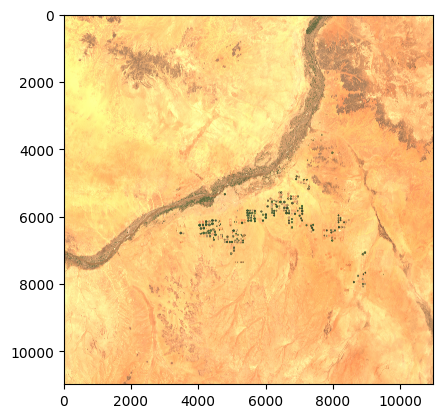

<Axes: >

In [25]:
from rasterio.plot import show
show(im_full)

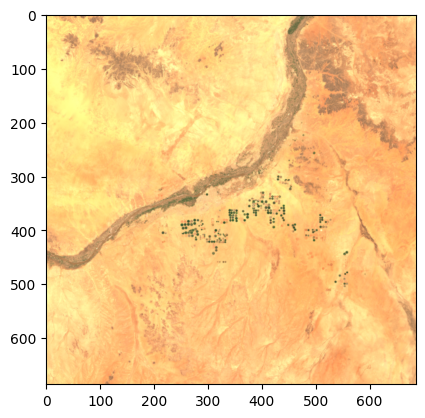

<Axes: >

In [26]:
show(im_ovr16)

## Step 3: Key Takeaways

- COG 포맷은 원격 저장소에 위치한다. (AWS S3와 같이 HTTP range-request가 가능한 파일 서버에 위치해 있다)
- GeoTIFF와 달리 원격에서 타일링과 오버뷰에 접근 가능하다.
- 네트워크는 비싸다. 그리고 느리다. 그러므로, 필요한 만큼만 전송해야 한다.
- COG + 타일링 + 오버뷰의 이점을 잘 활용합시다.

💡내 PC에 대용량 위성영상 다운로드하는 일에 너무 많은 시간을 쓰지 맙시다.